In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# I. Introduction

In this exercise I tried the famous titanic challenge from Kaggle. My goal was to predict whether or not a passenger survived the sinking of the titanic or not.

The original dataset includes the following variables:

| Variable | Definition | Key |
| :--- | :--- | :--- |
| PassengerId | Unique Id number of each passenger |
| Survived | Survival | 1 if survived, 0 if didn't survive |
| Pclass | Ticket class of passengers | 1 in 1st, 2 = 2nd, 3 = 3rd |
| Name | Name and title | |
| Sex | Sex | Male or female |
| Age | Age in years | |
| SibSp | Number of siblings or spouses on board | |
| Parch | Number of parents or children on board | |
| Ticket | Ticket number | |
| Fare | Passenger fare | |
| Cabin | Cabin number if known | |
| Embarked | Port where Embarked | C = Cherbourg, Q = Queenstown, S = Southampton |

In our case, the outcome variable is "Survived" and the predictor variables are what remains in the table.

# II. Summarizing the Data

I began by importing the necessary packages:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Next I read in the dataframe and did some exploratory analysis:

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Look for null values:

In [6]:
df.dropna(axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [7]:
df[df['Age'].isnull()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [8]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
df[df['Cabin'].isnull()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,687.000000,687.000000,687.000000,529.000000,687.000000,687.000000,687.000000
mean,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325
std,259.215905,0.458528,0.589602,13.472634,1.207492,0.827106,28.663343
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,214.500000,0.000000,2.000000,19.000000,0.000000,0.000000,7.877100
50%,441.000000,0.000000,3.000000,26.000000,0.000000,0.000000,10.500000
75%,664.500000,1.000000,3.000000,35.000000,1.000000,0.000000,23.000000
max,891.000000,1.000000,3.000000,74.000000,8.000000,6.000000,512.329200


Comparing the above to the original dataframe reveals the following:

| Column with null values | Number of missing values | Percentage of total dataset |
|------|------| ---- |
|   Age  | 177 | ~19.9%
|   Cabin    |  687 | ~77.1%
|  Embarked | 2 | ~0.2%

In the next part of the analysis I will explore different avenues for filling the missing values.

# III. Examining relationships with outcome variable:

First I just made some basic countplots to check if there was a difference in survival rate for those of different classes, genders and boarding sites.

Most of these result were kind of obvious:
    1. Men died at much higher rates than women
    2. 3rd class passengers died at a much higher rate compared to other classes (there were also more third class passengers on board, but still)

Below I wrote a function that would create a stacked bar plot to show the difference in survival for two classes.

In [10]:
def two_stacked_bars_plot(column, descriptor1, descriptor2, title, data):
    r = [0,1]
    blue_list = [len(data[(data[column]==descriptor1) & (data['Survived']==1)]), len(data[(data[column]==descriptor1) & (data['Survived']==0)])]
    orange_list = [len(data[(data[column]==descriptor2) & (data['Survived']==1)]), len(data[(data[column]==descriptor2) & (data['Survived']==0)])]
    
    new_data = {'blueBars':blue_list, 'orangeBars':orange_list}
    new_data_df = pd.DataFrame(new_data)
    
    totals = [i+j for i,j in zip(new_data_df['blueBars'], new_data_df['orangeBars'])]
    blueBars = [i/j * 100 for i,j in zip(new_data_df['blueBars'], totals)]
    orangeBars = [i/j * 100 for i,j in zip(new_data_df['orangeBars'], totals)]
    
    barWidth = 0.7
    names = ('Survived','Died')
    plt.bar(r, orangeBars, color='#f9bc86', edgecolor='white', width=barWidth, label=descriptor2)
    plt.bar(r, blueBars, bottom=orangeBars, color='#a3acff', edgecolor='white', width=barWidth, label=descriptor1)
    
    plt.title(title)
    plt.xticks(r, names)
    plt.legend(loc='lower right', bbox_to_anchor=(1.25,-0.03))
    
    plt.show()

I first wanted to look at the survival by gender:

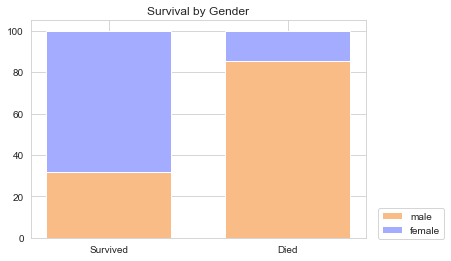

In [11]:
two_stacked_bars_plot('Sex', 'female', 'male', 'Survival by Gender', data=df)

Next I wrote a function that would create a stacked barplot for 3 classes

In [12]:
def three_stacked_bars_plot(column, descriptor1, descriptor2, descriptor3, title, data):
    r = [0,1]
    blue_list = [len(data[(data[column]==descriptor1) & (data['Survived']==1)]), len(data[(data[column]==descriptor1) & (data['Survived']==0)])]
    orange_list = [len(data[(data[column]==descriptor2) & (data['Survived']==1)]), len(data[(data[column]==descriptor2) & (data['Survived']==0)])]
    green_list = [len(data[(data[column]==descriptor3) & (data['Survived']==1)]), len(data[(data[column]==descriptor3) & (data['Survived']==0)])]
    
    new_data = {'blueBars':blue_list, 'orangeBars':orange_list, 'greenBars':green_list}
    new_data_df = pd.DataFrame(new_data)
    
    totals = [i+j+k for i,j,k in zip(new_data_df['blueBars'], new_data_df['orangeBars'], new_data_df['greenBars'])]
    blueBars = [i/j * 100 for i,j in zip(new_data_df['blueBars'], totals)]
    orangeBars = [i/j * 100 for i,j in zip(new_data_df['orangeBars'], totals)]
    greenBars = [i/j * 100 for i,j in zip(new_data_df['greenBars'], totals)]
    
    barWidth = 0.7
    names = ('Survived','Died')
    plt.bar(r, blueBars, color='#a3acff', edgecolor='white', width=barWidth, label=descriptor1)
    plt.bar(r, orangeBars, bottom=blueBars, color='#f9bc86', edgecolor='white', width=barWidth, label=descriptor2)
    plt.bar(r, greenBars, bottom=[i+j for i,j in zip(blueBars, orangeBars)], color='#b5ffb9', edgecolor='white', width=barWidth, label=descriptor3)
    
    plt.title(title)
    plt.xticks(r, names)
    plt.legend(loc='lower right', bbox_to_anchor=(1.25,-0.03))
    
    plt.show()

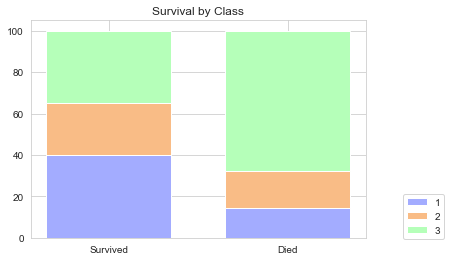

In [13]:
three_stacked_bars_plot('Pclass', 1, 2, 3, 'Survival by Class', data=df)

Text(0.5,1,'Number of people per class')

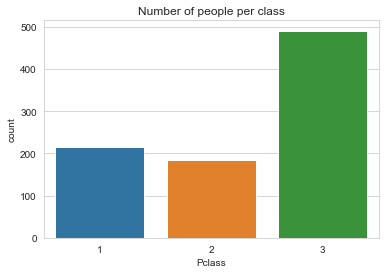

In [14]:
sns.countplot(x='Pclass',data=df)
plt.title('Number of people per class')

Next I wanted to see if there was a relationship between age, class and survival:

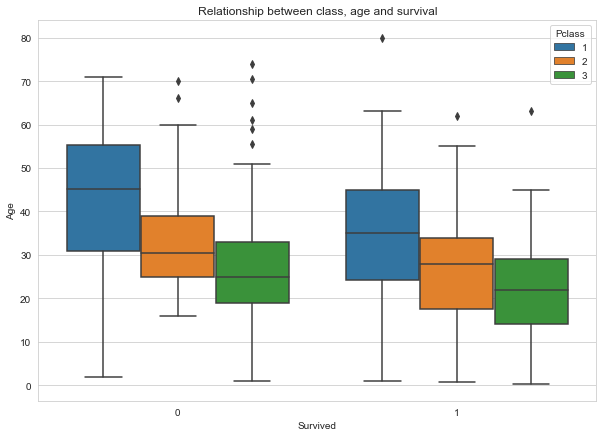

In [15]:
plt.figure(figsize=(10,7))
plt.title('Relationship between class, age and survival')
sns.boxplot(x='Survived',y='Age',hue='Pclass',data=df)

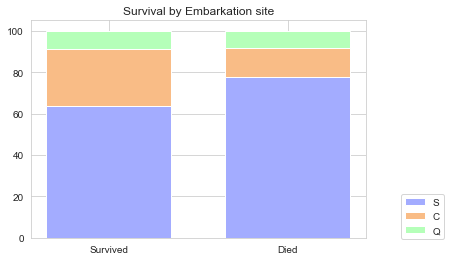

In [16]:
three_stacked_bars_plot('Embarked', 'S', 'C', 'Q', 'Survival by Embarkation site', data=df)

I wanted to explore if having family on board had any effect on survival so I made a new column called 'Family Size':

In [17]:
df['Family Size'] = df['SibSp'] + df['Parch']

Text(0.5,1,'Family size and Survival')

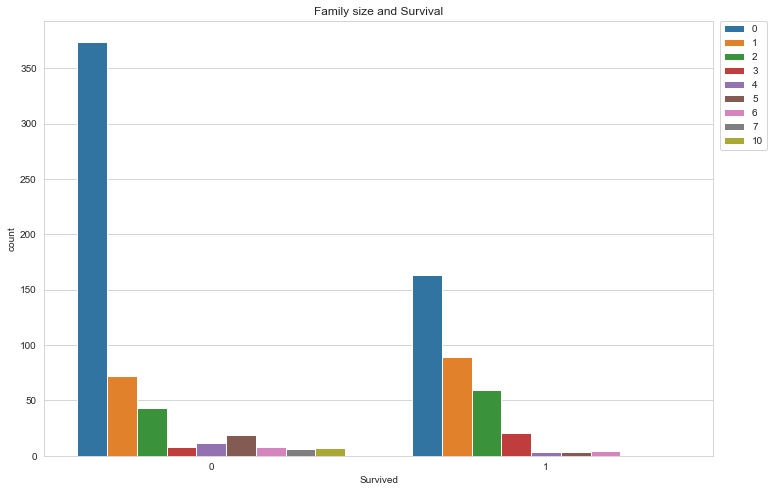

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x='Survived',hue='Family Size',data=df)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.title('Family size and Survival')

The above graph wasn't particulary helpful so I made a new column called 'Family present'

In [19]:
df['Family present'] = df['Family Size'] > 0

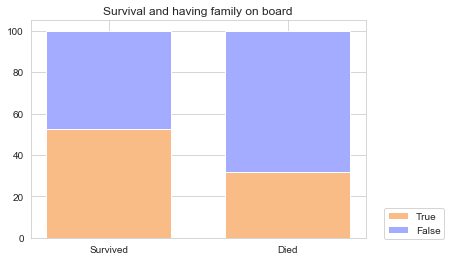

In [20]:
two_stacked_bars_plot('Family present', False, True, 'Survival and having family on board', data=df)

The above is more helpful and suggests that having family on board does increase probability of survival.

I then decided to check if there was a difference between survival rates for men versus women on board:

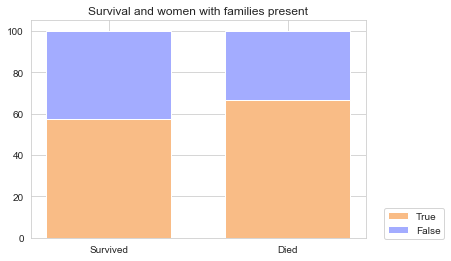

In [21]:
two_stacked_bars_plot('Family present', False, True, 'Survival and women with families present', data=df[df['Sex']=='female'])

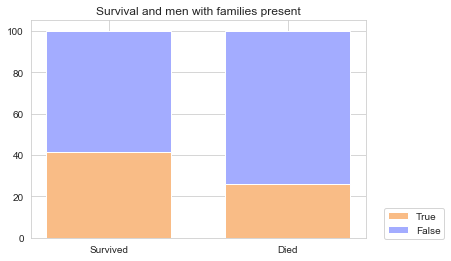

In [22]:
two_stacked_bars_plot('Family present', False, True, 'Survival and men with families present', data=df[df['Sex']=='male'])

It does seem like having family aboard wasn't significant for survival rates of women but had a slightly more meaningful effect for men.

# IV. Cleaning data and transformations

## Dealing with null values

My first consideration was what to do about the null values. Since I don't have a lot of data to work with, I was reticent about removing cells/columns and instead decided to try a few different methods depending on the column in question.

### Null values for 'Embarked'

This was the easiest one to deal with. As shown above, there were only 2 missing values or 0.2% of the dataset. I decided to fill in with "Southampton" since that was by far the most common boarding point.

Text(0.5,1,'Number of people boarding at each site')

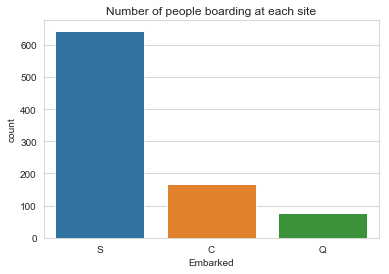

In [23]:
sns.countplot(x='Embarked',data=df)
plt.title('Number of people boarding at each site')

In [24]:
df['Embarked'].fillna(value='S',inplace=True)

### Null values for 'Cabin'

First I wanted to investigate how many different cabins there were:

In [25]:
df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
E101           3
D              3
F2             3
C22 C26        3
B58 B60        2
F4             2
D36            2
E33            2
B51 B53 B55    2
E121           2
B28            2
C65            2
B5             2
E67            2
C123           2
C124           2
E44            2
B35            2
C2             2
E24            2
F G73          2
C92            2
B18            2
B77            2
C125           2
E25            2
              ..
D15            1
C87            1
E36            1
C85            1
D45            1
A19            1
E46            1
D10 D12        1
E10            1
A32            1
E49            1
F E69          1
T              1
B69            1
E34            1
E17            1
B39            1
F38            1
A16            1
C91            1
B102           1
B82 B84        1
A7             1
C49            1
F G63          1
C54            1
B42            1
B78           

Next I created a new column called "Has Cabin" to see if there was a relationship between having a cabin and survival

In [26]:
df['Has Cabin'] = df['Cabin'].isnull() == False

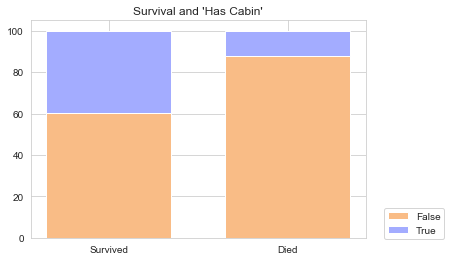

In [27]:
two_stacked_bars_plot('Has Cabin', True, False, "Survival and 'Has Cabin'", data=df)

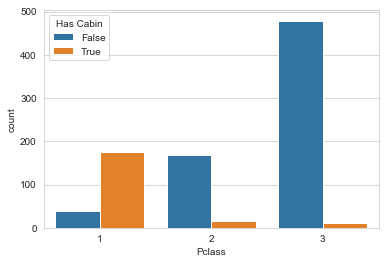

In [28]:
sns.countplot(x='Pclass',hue='Has Cabin',data=df)

The first graph suggests that there is a relationship between having a cabin and survival. Unsurprisingly, the second graph indicates that this relationship is most likely due to class. 

Either way, it seems as though 'Has Cabin' is an important feature to include in the model and we will use this and drop the 'Cabin' column.

In [30]:
df.drop('Cabin',axis=1,inplace=True)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Family present,Has Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,True,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,True,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,False,False


## Null values for Age

This was the trickist one to deal with. My idea was just to break down the dataset as much as possible so that I could make my nulls specific to each individual.

First I wanted to check if there was a relationship between age and sex:

In [32]:
df[df['Sex'] == 'male'].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size
count,577.000000,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000,577.000000
mean,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.665511
std,257.486139,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263,1.478106
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,464.000000,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000,0.000000
75%,680.000000,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200,10.000000


In [33]:
df[df['Sex'] == 'female'].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size
count,314.000000,314.000000,314.000000,261.000000,314.000000,314.000000,314.000000,314.000000
mean,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,1.343949
std,256.846324,0.438211,0.857290,14.110146,1.156520,1.022846,57.997698,1.755733
min,2.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000,0.000000
25%,231.750000,0.000000,1.000000,18.000000,0.000000,0.000000,12.071875,0.000000
50%,414.500000,1.000000,2.000000,27.000000,0.000000,0.000000,23.000000,1.000000
75%,641.250000,1.000000,3.000000,37.000000,1.000000,1.000000,55.000000,2.000000
max,889.000000,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200,10.000000


So yeah, both the mean and median age of women is smaller then for men.

Next I wanted to check if there was a difference in age between different sexes and classes.

Text(0.5,1,'Relationship between Age and Class')

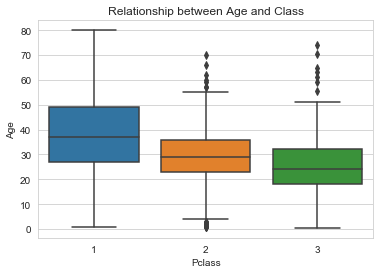

In [34]:
sns.boxplot(x='Pclass',y='Age',data=df)
plt.title('Relationship between Age and Class')

It appears that people in 3rd class are typically younger, which kind of makes sense because it takes time to accumulate wealth.

As of now, I know that I will incorporate both sex and class into consideration when filling the null values.

One thing is bugging me though, and it's what to do with that pesky name column. I recognized that honorifics are included in that column, and I want to pull those out to see if they have any effect on age. Additionally, it is possible that they have an effect on surivival, and more 'esteemed' titles that indicate nobility would have a positive effect on survival.

First I create a new column called 'Title':

In [35]:
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1]).apply(lambda name: name.split()[0])

Next I wanted to check if there was a relationship between title and age:

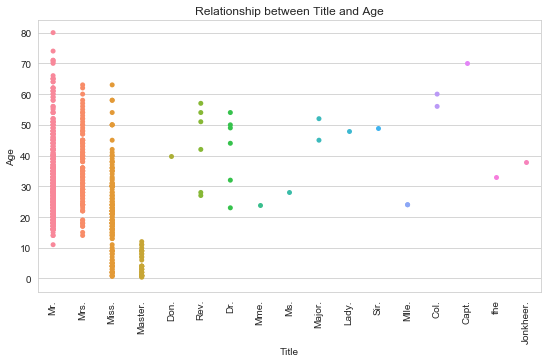

In [36]:
plt.figure(figsize=(9, 5))
plt.title('Relationship between Title and Age')
plt.xticks(rotation=90)
sns.stripplot(x='Title',y='Age',jitter=False,data=df)

Okay ... there does appear to be a relationship between title and age so it is probably worth it to do something meaningful with this column.

I decided to create a dictionary in order to generalize some of the titles a bit more:

In [37]:
honorific_dict = {'Mr.':'Mr',
              'Miss.':'Miss',
              'Mrs.':'Mrs',
              'Master.':'Master',
              'Dr.':'Professional',
             'Rev.':'Professional',
             'Mlle.':'Miss',
             'Col.':'Professional',
             'Major.':'Professional',
             'Capt.':'Professional',
             'Ms.':'Mrs',
             'the':'Nobility',
             'Sir.':'Nobility',
             'Mme.':'Mrs',
             'Don.':'Nobility',
             'Lady.':'Nobility',
             'Jonkheer.':'Nobility'
             }

# note: mapped 'the' to nobility because, upon inspection, the actual honorific is "Countess"

Next I created a more concise and meaningful title column by mapping the dictionary onto the existing titles:

In [38]:
df['Title'] = df['Title'].map(honorific_dict)

I checked if my new title column gave some clarity into the relationship between title and age:

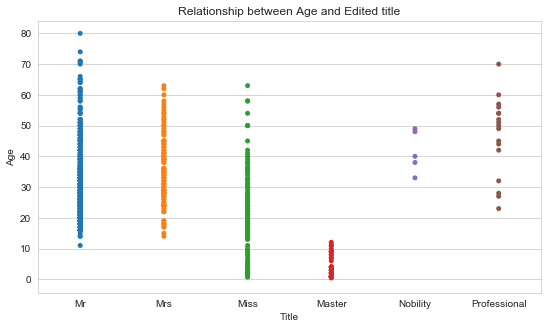

In [39]:
plt.figure(figsize=(9, 5))
plt.title('Relationship between Age and Edited title')
sns.stripplot(x='Title',y='Age',jitter=False,data=df)

Yup, it does appear as though there is a relationship between title and age.

I now have a strategy for filling null age values:
    1. First fill missing age values according to the median age of that same title
    2. Next fill according in median age according to sex and class
    
I chose the median because, upon inspection, in most instances the mean was higher than the median which suggested that there were outliers.

In [40]:
for title in ['Master','Nobility','Professional']:
    df.loc[df['Age'].isnull() & (df['Title'] == title), 'Age'] = df.loc[(df['Title'] == title), 'Age'].median()

In [41]:
for sex in ['male','female']:
    for pclass in [1,2,3]:
        df.loc[df['Age'].isnull() & (df['Sex'] == sex) & (df['Pclass'] == pclass), 'Age'] = df.loc[(df['Sex'] == sex) & (df['Pclass'] == pclass), 'Age'].median()

### Standardize the data

Since I am using regression analysis it is important that I standardize my data. I have done so below.

In [42]:
num_vars = ['Age','Fare','SibSp','Parch']

In [43]:
scaler = StandardScaler()

In [44]:
df[num_vars] = scaler.fit_transform(df[num_vars])

Since I am going to try both random forest and logistic regression, I am first going to save the data to a new csv file which I will use to create both models. The reason I am doing this is because I don't need to have n-1 dummy variables to conduct random forest because random forest doesn't care if there is perfect collinearity among the variables. Regression however does care so I will need to have n-1 dummy variables. Because of this I chose to separate it out.

In [45]:
df.to_csv('transf_data_titanic.csv',index=False)

# V. Creating and running the model: random forest

### Read in the dataframe

In [46]:
df_rf = pd.read_csv("transf_data_titanic.csv")

### Convert categorical variables into dummy variables:

In [47]:
df_rf = pd.get_dummies(df_rf,columns=['Title','Sex','Embarked','Pclass','Has Cabin'])

In [48]:
df_rf.drop(columns=['Name','Ticket','PassengerId','Family present','Family Size'],inplace=True)

### Prepare data to run:

In [49]:
X_rf = df_rf.drop('Survived',axis=1)
y_rf = df_rf['Survived']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.25, random_state=101, stratify=y_rf)

### Run model:

In [51]:
rfc = RandomForestClassifier(n_estimators=200,criterion='gini',random_state=101,oob_score=True)

In [52]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=101, verbose=0, warm_start=False)

In [53]:
rfc_pred = rfc.predict_proba(X_test)

### Creating feature importance plot:

In [54]:
feature_importances = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

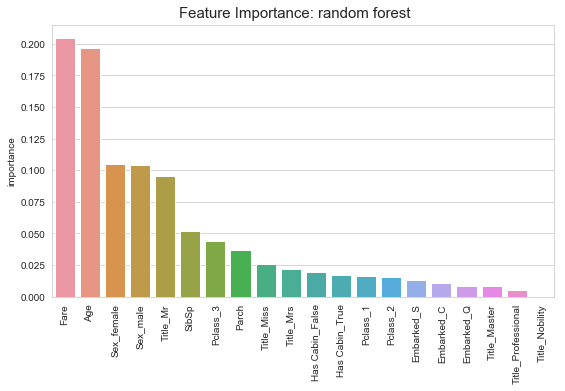

In [55]:
plt.figure(figsize=(9,5))
plt.figtext(.5,.9,'Feature Importance: random forest', fontsize=15, ha='center')
plt.xticks(rotation=90)
sns.barplot(x=feature_importances.index, y=feature_importances['importance'], data=feature_importances)

The above is sort of in line with what I determined during the exploratory part of this project. Age and fare are the most important variables which makes sense since fare is sort of a more detailed proxy for class.

One thing I found interesting is the discrepancy in importance for the title features. The third most important variable was the title "Mr." but the rest of the title variables are much less important. This could partially be due to the fact that some of the titles such as nobility and master had very few occurances and random forest can be biased against features with very unequal classes.

# VI. Creating and running the model: logistic regression

### Convert categorical variables into n-1 dummies:

In [56]:
title = pd.get_dummies(df['Title'],drop_first=True)
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
pclass = pd.get_dummies(df['Pclass'],drop_first=True)
df = pd.concat([df,embark,pclass,sex,title],axis=1)

### Drop unnecessary columns:

In [57]:
df.drop(['PassengerId','Name','Ticket','Embarked','Title','Family Size','Pclass','Sex','Family present'],axis=1,inplace=True)

### Prepare the data to run:

In [58]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101, stratify=y)

### Run logistic regression:

In [60]:
logmodel = LogisticRegression()

In [61]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
predictions = logmodel.predict_proba(X_test)

#  VII. Evaluating the models

I calculated the ROC for both logistic regression and random forests models and plotted them on the same graph.

In [63]:
# for logistic regression
fpr_lg, tpr_lg, thresholds = roc_curve(y_test, predictions[:,1])
roc_auc_lg = auc(fpr_lg, tpr_lg)

# for random forest
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, rfc_pred[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

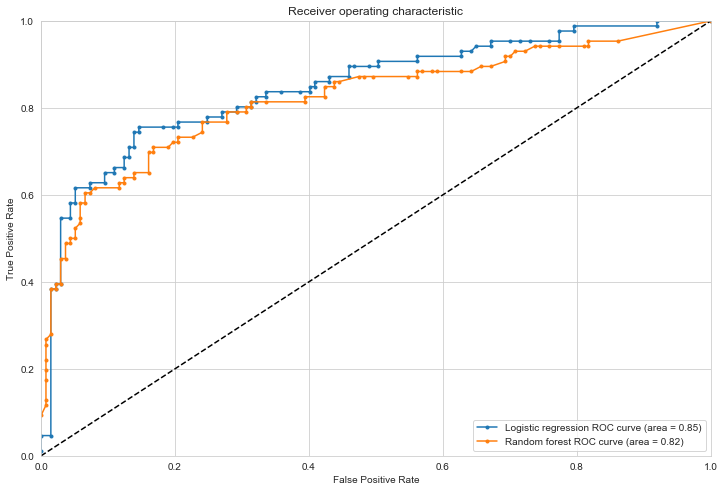

In [64]:
def generate_ROCplot(fpr_lg,tpr_lg,label1,roc_auc_lg,fpr_rf,tpr_rf,label2,roc_auc_rf):
    plt.clf()
    plt.plot(fpr_lg, tpr_lg, '.-', label='Logistic regression ROC curve (area = %0.2f)' % roc_auc_lg)
    plt.plot(fpr_rf, tpr_rf, '.-', label='Random forest ROC curve (area = %0.2f)' % roc_auc_rf)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
plt.figure(figsize=(12,8))
generate_ROCplot(fpr_lg,tpr_lg,'LR',roc_auc_lg,fpr_rf,tpr_rf,'RF',roc_auc_rf)

The AUROC curve is ~0.85 for logistic regression and ~0.83 for random forests.

#### Additionally, I wanted to check whether or not my results would be different had I just imputed the median value of the entire age column when computing the nulls. I checked this for logistic regression only because logistic regression outperformed random forests.

I read in the file and proceeded to transform the dataframe as I had done above, but instead used the median age for all the nulls.

In [65]:
df1 = pd.read_csv('train.csv')

In [66]:
# Fill null values, create title column as above:

df1['Embarked'].fillna(value='S',inplace=True)
df1['Has Cabin'] = df1['Cabin'].isnull() == False
df1['Age'].fillna(df['Age'].median(),inplace=True)

df1['Title'] = df1['Name'].apply(lambda name: name.split(',')[1]).apply(lambda name: name.split()[0])
df1['Title'] = df1['Title'].map(honorific_dict)

In [67]:
# Prepare model to run:

title1 = pd.get_dummies(df1['Title'],drop_first=True)
sex1 = pd.get_dummies(df1['Sex'],drop_first=True)
embark1 = pd.get_dummies(df1['Embarked'],drop_first=True)
pclass1 = pd.get_dummies(df1['Pclass'],drop_first=True)
df1 = pd.concat([df1,embark1,pclass1,sex1,title1],axis=1)

In [68]:
# Get rid of unnecessary columns

df1.drop(['PassengerId','Name','Pclass','Cabin','Embarked','Ticket','Sex','Title'],axis=1,inplace=True)

In [69]:
X1 = df1.drop('Survived',axis=1)
y1 = df1['Survived']

In [70]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=101)

In [71]:
logmodel_1 = LogisticRegression()

In [72]:
logmodel_1.fit(X1_train,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
predictions1 = logmodel_1.predict_proba(X1_test)

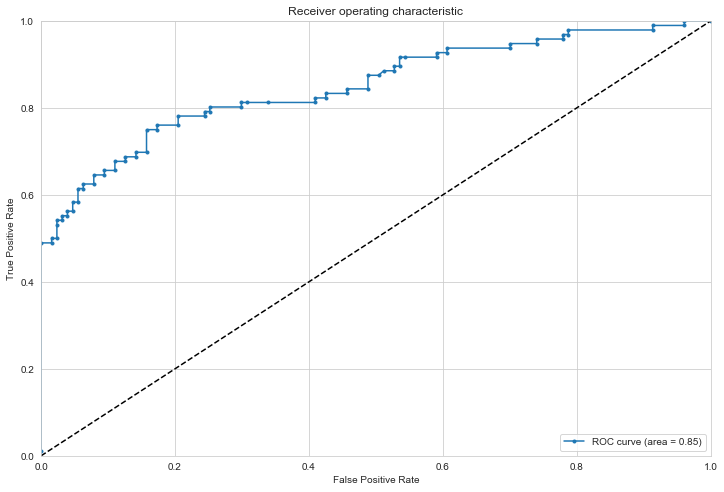

In [74]:
fpr1, tpr1, thresholds1 = roc_curve(y1_test, predictions1[:,1])
roc_auc = auc(fpr1, tpr1)

def generate_ROCplot(fpr1,tpr1,label,roc_auc):
    plt.clf()
    plt.plot(fpr1, tpr1, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
plt.figure(figsize=(12,8))
generate_ROCplot(fpr1,tpr1,'LR',roc_auc)

Well, evidently the ROC curve is still the same whether or not you use the median value for all ages to fill the nulls or make it more individual as I did in the first instance.

This is definitely a lesson to me on the importance of using the ROC curve to evaluate a classification model. Originally I had not used the ROC curve and judged my model based on its 'precision' according to the arbitrary cutoff that scikit learn sets its logistic model at. In this instance, I got a higher 'precision' from filling the null values as I did in the first instance compared to just using the median age for all the nulls where I got a lower 'accuracy.'

# VIII. Future directions

### Making use of the ticket data

One thing that I noticed while playing around with the ticket data was that in a few instances people with the same ticket were shown as having no family members on board. I assumed that these people operated as caregivers, since the other people or person holding the same ticket was often much younger or much older in age. I would use this information to change the 'Family present' column to 'Not alone' in order to better capture the social circle of those on board.

### Making it more rigorous

This was a fun analysis, but I do think I could have made it a bit more rigorous in a few different ways. Next time I would definitely cross-validate and examine the correlation among variables more closely. If I had done more work exploring the correlation among variables I may have realized that spending a lot of time figuring out increasingly complicated ways of filling the null age values wouldn't be particularly useful. I also might examine the coefficients of the explanatory variables after completing the regression.